In [1]:
%matplotlib inline
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
STEP = 0.001
X_lin = np.mgrid[0:1 + STEP:STEP, 0:1 + STEP:STEP]

X = np.c_[X_lin[0].ravel(), X_lin[1].ravel()]

mul =  X[:, 0] * X[:, 1] 
mul = mul * (0.90 + np.random.rand() * 0.2) # ruido de +- 5%
y = mul > 0.2

X_large, X_test, y_large, y_test = train_test_split(X, y, train_size=1000, test_size=400, random_state=42)
X_short, _, y_short, _ = train_test_split(X_large, y_large, train_size=100, random_state=42)

In [3]:
def show_boundary(predict_func, title, X, y, ax=None):
    STEP = 0.01
    X_lin = np.mgrid[0:1 + STEP:STEP, 0:1 + STEP:STEP]

    Z = predict_func(np.c_[X_lin[0].ravel(), X_lin[1].ravel()])
    Z = Z.reshape(X_lin[0].shape)

    if ax is None:
        fig, ax = plt.subplots(1, 1)

    ax.contourf(X_lin[0], X_lin[1], Z, cmap='Blues')
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_title(title)

In [4]:
models = {
    'linear_regresion': LogisticRegression(),
    'lr + polynomial': make_pipeline(PolynomialFeatures(2), LogisticRegression(penalty='none')), 

    'tree': DecisionTreeClassifier(max_depth=3),
    'tree + polynomial': make_pipeline(PolynomialFeatures(2), DecisionTreeClassifier(max_depth=3)), 
    
    'rf': RandomForestClassifier(max_depth=3),
    'rf + polynomial': make_pipeline(PolynomialFeatures(2), RandomForestClassifier(max_depth=3)), 

    'MLP': make_pipeline(MLPClassifier()), 
    'MLP + polynomial': make_pipeline(PolynomialFeatures(2), MLPClassifier()), 
}

/home/ariel/Envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ariel/Envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


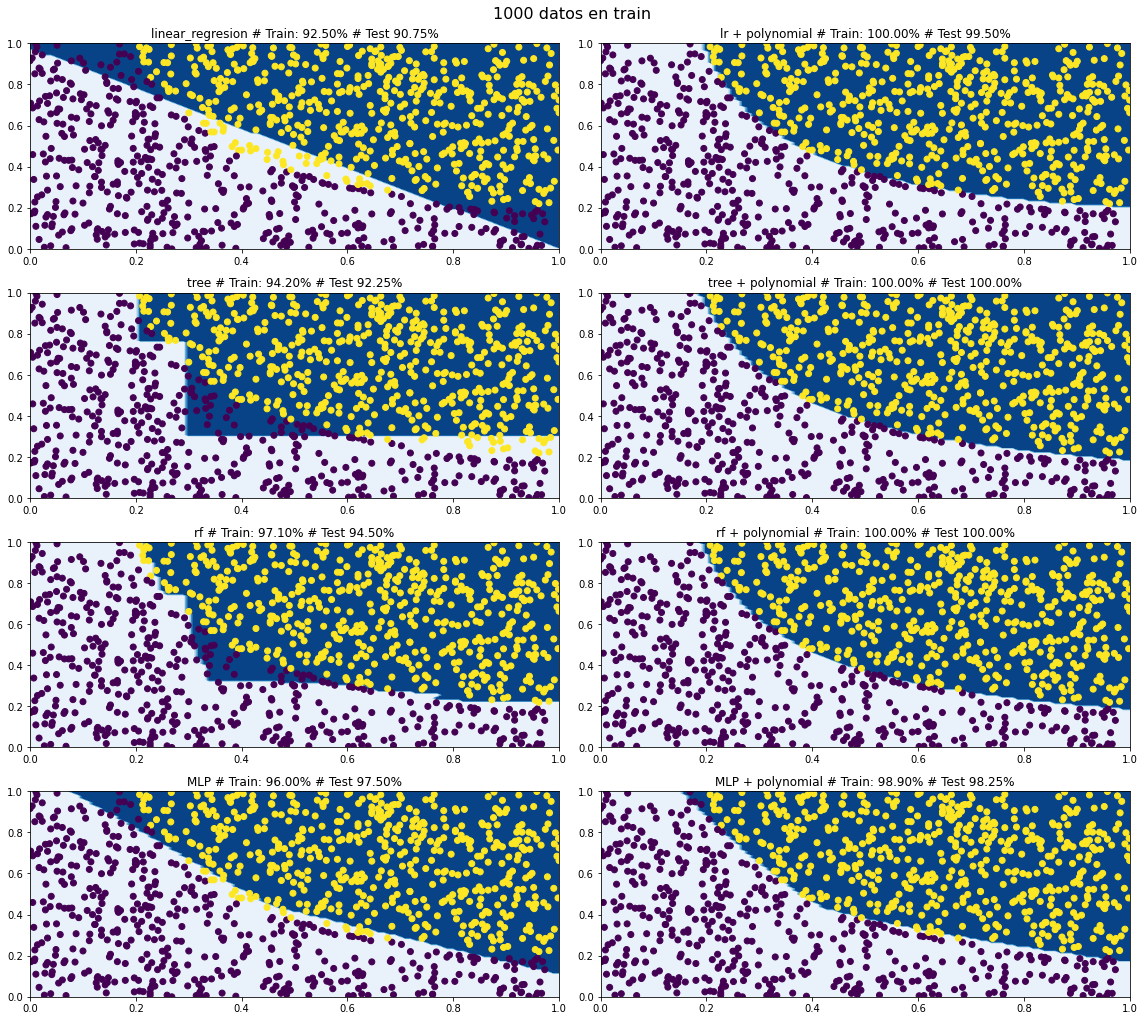

In [5]:
X, y = X_large, y_large

fig, axis = plt.subplots(4, 2, figsize=(16, 14))
for ax, (t, m) in zip(axis.flatten(), models.items()):
    m.fit(X, y)
    acc_train = metrics.accuracy_score(y, m.predict(X))
    acc_test = metrics.accuracy_score(y_test, m.predict(X_test))
    show_boundary(m.predict, f'{t} # Train: {acc_train:.2%} # Test {acc_test:.2%}', X, y, ax=ax)
    
fig.suptitle('{} datos en train'.format(len(X)), y=1.01, fontsize=16)
plt.tight_layout()

/home/ariel/Envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ariel/Envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


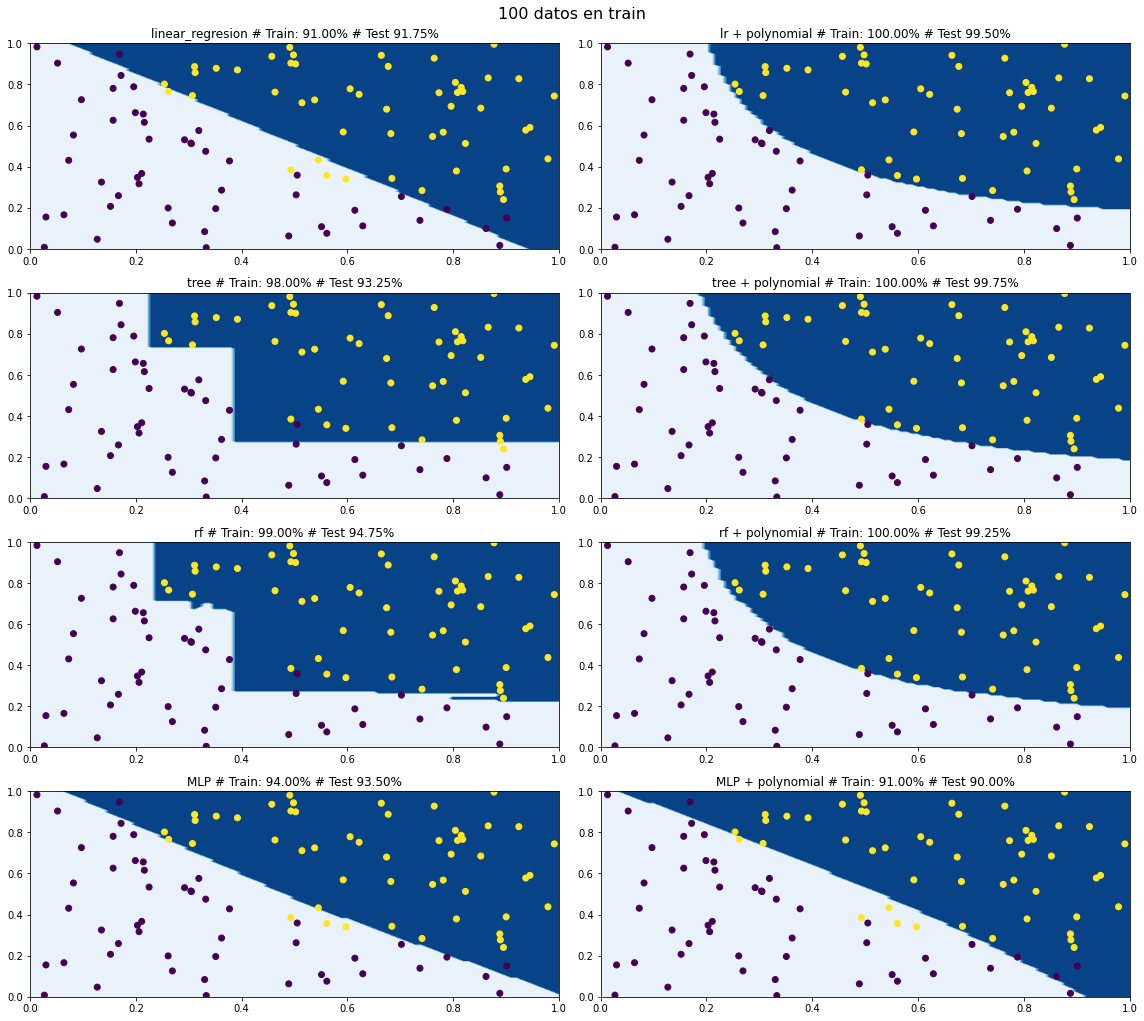

In [6]:
X, y = X_short, y_short

fig, axis = plt.subplots(4, 2, figsize=(16, 14))
for ax, (t, m) in zip(axis.flatten(), models.items()):
    m.fit(X, y)
    acc_train = metrics.accuracy_score(y, m.predict(X))
    acc_test = metrics.accuracy_score(y_test, m.predict(X_test))
    show_boundary(m.predict, f'{t} # Train: {acc_train:.2%} # Test {acc_test:.2%}', X, y, ax=ax)
    
fig.suptitle('{} datos en train'.format(len(X)), y=1.01, fontsize=16)
plt.tight_layout()